# Graphs

A **graph** is defined as a **pair** $G = (V, E)$, with $V$ is a set of elements called **nodes** or **vertices**, and $E$ is a set of paired vertices, called **edges** or **links**.

Graph structures are omni-present in many areas as a useful modeling tool for **representing relations between elements** in a structure. 

<img src="https://inst.eecs.berkeley.edu/~cs61bl/r//cur/graphs/web.graph.png"/>

The **WWW** can be seen a huge **graph**. The pages are the nodes and the edges are the **links** between pages (one directed edge from node $A$ to $B$ means that there is a link in page $A$ that points to page $B$). Note that the relation encoded through the edges is not symmetric. We say the graph is **directed**. 

The **Page Ranking** algorithm uses this structure to produce the search results.



<img src="https://i.insider.com/4f5112e169bedd1526000061?width=700&format=jpeg&auto=webp"/>

In **Facebook** and most social networks, persons profiles are the nodes of the so-called **social graph**. If $A$ and$B$ are "friends", there is an edge between them. The edges correspond to a two-way relationship and we say that the corresponding graph is **undirected**.

The algorithms that **recommend potential "friends"** are based on graph theory.

<img src="https://www.google.com/maps/d/u/0/thumbnail?mid=1v52QWC6g1seS7zWlUpFSILrPQUE&hl=en"/> 

To be able to recommend paths to its users, **Google Maps** uses graphs, where roads intersections are the **nodes** and pieces of roads between nodes are the edges. To recommend a path, typically **shortest paths algorithms** are used. 

Is this a directed or undirected graph?

# NetworkX

NetworkX has become the most commonly used library to implement **graph-related algorithms** in Python.

https://networkx.org/documentation/stable/index.html

To install it in your Python installation, for example with pip:

```
pip install networkx
```

In [ ]:
import networkx as nx

In [ ]:
# Let us start with an empty graph
G = nx.Graph()

## Adding nodes

* The nodes maybe added **individually** with the method *add_node()* or by reading them from a **container** (a list, a dictionary...) with the method *add_nodes_from()*.
* The node labels may be **any kind of Python objects** (the only condition being that it is *hashable*): integers, floating point numbers, strings...

In [ ]:
# Adding individual nodes
G.add_node('First')
G.add_node(2)
G.add_node((4,5))

Non-hashable objects are not allowed! Lists, dictionaries are non-hashable.

In [ ]:
# A thing we cannot as a node
G.add_node([1,4])

TypeError: ignored

In [ ]:
# A thing we cannot as a node
G.add_node({'a':"An entry"})

TypeError: ignored

In [ ]:
# Adding nodes from a container of nodes
G.add_nodes_from(['Second', 3])

# In the case of a dictionary, it takes the keys as nodes
G.add_nodes_from({'a':1.0,'b':-3.0})

In [ ]:
# What is happening here?
G.add_nodes_from("OMG")

You can have access to the list of current nodes through the *nodes* element.

In [ ]:
# Printing all the nodes
print('Nodes:', G.nodes)

Nodes: ['First', 2, (4, 5), 'Second', 3, 'a', 'b', 'O', 'M', 'G']


## Adding edges

To **add edges**, use the method *add_edge()* with two arguments: the two nodes that will be connected by this new edge.

You an also add edges lik with nodes, from a **container** (e.g., a list) of 2-uples specifying edges: *add_edges_from()*.

In [ ]:
# Using add_edge()
G.add_edge('First',3)
G.add_edge('a',3)
G.add_edge('b',(4,5))
G.add_edge('M','G')

# Using add_edges_from()
G.add_edges_from([(2,3),('Second','b')])

In [ ]:
# Printing all edges
print('Edges:', G.edges)

Edges: [('First', 3), (2, 3), ((4, 5), 'b'), ('Second', 'b'), (3, 'a'), ('M', 'G')]


Note that if you specify an edge with nodes **that are not part of your graph**, these nodes are automatically **added to the graph**.

In [ ]:
# Edges with non-existing nodes
G.add_edge('First',1)
G.add_edge('a',0)
print('Nodes:', G.nodes)
print('Edges:', G.edges)

Nodes: ['First', 2, (4, 5), 'Second', 3, 'a', 'b', 'O', 'M', 'G', 1, 0]
Edges: [('First', 3), ('First', 1), (2, 3), ((4, 5), 'b'), ('Second', 'b'), (3, 'a'), ('a', 0), ('M', 'G')]


In [ ]:
# An edge specified by a 2-uple
e = (1, 4)
G.add_edge(*e)  # unpack edge tuple with '*'

In [ ]:
# Printing nodes and edges
print('Nodes:', G.nodes)
print('Edges:', G.edges)

Nodes: ['First', 2, (4, 5), 'Second', 3, 'a', 'b', 'O', 'M', 'G', 1, 0, 4]
Edges: [('First', 3), ('First', 1), (2, 3), ((4, 5), 'b'), ('Second', 'b'), (3, 'a'), ('a', 0), ('M', 'G'), (1, 4)]


A **path** is a sequence of distinct edges that joins a set of nodes. It is represented as the sequence of nodes it connects.


The function *add_path()* allows to add **all the edges corresponding to a path**.

In [ ]:
# Adding a path
nx.add_path(G,[1, 2, 3, 5, 'O', 'M', 'G'])

print('Nodes:', G.nodes)
print('Edges:', G.edges)

Nodes: ['First', 2, (4, 5), 'Second', 3, 'a', 'b', 'O', 'M', 'G', 1, 0, 4, 5]
Edges: [('First', 3), ('First', 1), (2, 3), (2, 1), ((4, 5), 'b'), ('Second', 'b'), (3, 'a'), (3, 5), ('a', 0), ('O', 5), ('O', 'M'), ('M', 'G'), (1, 4)]


## Graph visualization: the matplotlib way

In [ ]:
# Using matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18, 9]

The funtion *draw()* from networks draw the graph, and specifies how to draw it (geometry, aesthetics...)

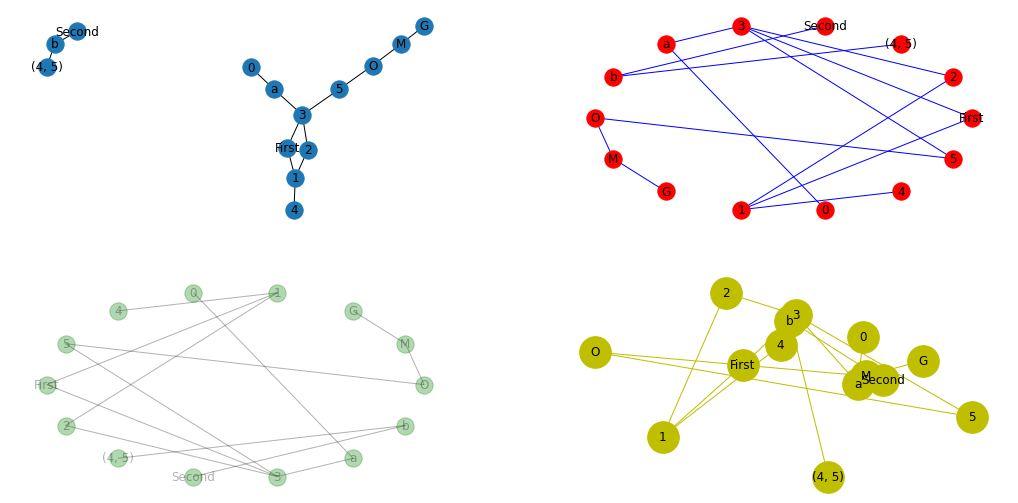

In [ ]:
# Four different ways (layouts, colors, edge colors) to plot the same graph
plt.subplot(221)
nx.draw(G,with_labels=True)   # default spring_layout, blue color, edge color black

plt.subplot(222)
nx.draw(G, with_labels=True, pos=nx.circular_layout(G), node_color='r', edge_color='b')

plt.subplot(223)
nx.draw(G, with_labels=True, pos=nx.shell_layout(G), node_color='g', edge_color='k',alpha=0.3)

plt.subplot(224)
nx.draw(G, with_labels=True, pos=nx.random_layout(G), node_color='y', edge_color='y', node_size = 1000)

* Basically, a **scatterplot** in matplotlib.
* You can choose a **predefined layout** to the drawing on the plane.

## Graph inspection

In [ ]:
# Print number of nodes, edges
print(G.number_of_nodes(),G.number_of_edges())

14 13


In [ ]:
# Getting nodes and edges as lists
list(G.nodes)
print(type(G.nodes))
list(G.edges)
print(type(G.edges))

<class 'networkx.classes.reportviews.NodeView'>
<class 'networkx.classes.reportviews.EdgeView'>


In [ ]:
# Iterating over nodes
for node in G.nodes:
    # From the iterable G.nodes, you can do something to all your nodes
    print(node)

First
2
(4, 5)
Second
3
a
b
O
M
G
1
0
4
5


The **adjacency list** of the graph is a dictionary of dictionaries. For each node (the keys of the dictionary), it gives you the set of edges connected to this node.

In [ ]:
# Getting the adjacency as list
print(G.adj)
list(G.adj[1])  # or list(G.neighbors(1))


{'First': {3: {}, 1: {}}, 2: {3: {}, 1: {}}, (4, 5): {'b': {}}, 'Second': {'b': {}}, 3: {'First': {}, 'a': {}, 2: {}, 5: {}}, 'a': {3: {}, 0: {}}, 'b': {(4, 5): {}, 'Second': {}}, 'O': {5: {}, 'M': {}}, 'M': {'G': {}, 'O': {}}, 'G': {'M': {}}, 1: {'First': {}, 4: {}, 2: {}}, 0: {'a': {}}, 4: {1: {}}, 5: {3: {}, 'O': {}}}


['First', 4, 2]

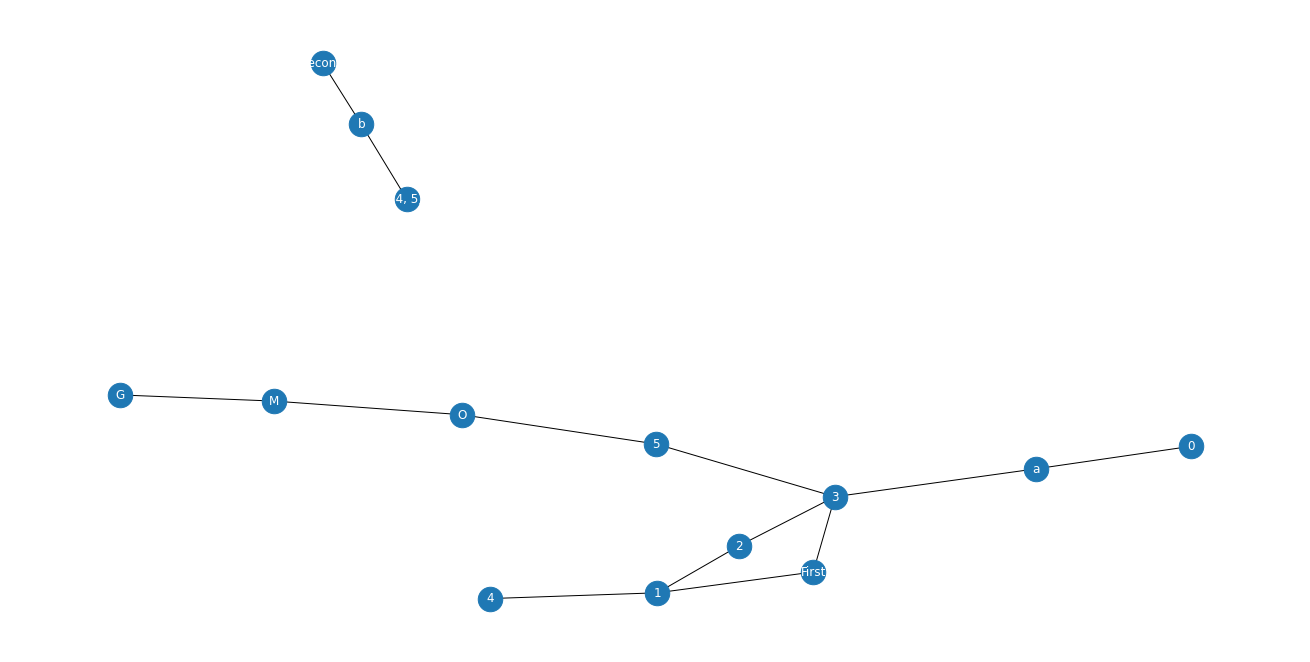

In [ ]:
nx.draw(G, node_size=600,font_color='w', with_labels=True)

The **degree of a node** is defined by the number of edges incident to it.

In [ ]:
# The number of edges incident to 1
G.degree[1]
print(G.degree) 

[('First', 2), (2, 2), ((4, 5), 1), ('Second', 1), (3, 4), ('a', 2), ('b', 2), ('O', 2), ('M', 2), ('G', 1), (1, 3), (0, 1), (4, 1), (5, 2)]


You can ask for the degrees of a set of nodes (note that for this we use parenthesis instead of square brackets):

In [ ]:
# The number of edges incident to 2,3,4    
G.degree([2,3,'First'])  

DegreeView({2: 2, 3: 4, 'First': 2})

Note that the length of the adjacency list of a node is, by definition, the degree of the node.

In [ ]:
# Let us check that the degree is the same as the length of the adjacency list
node = 'O'
G.degree[node] == len(G.adj[node])

True

The graph can be accessed with **subscript notation** that implicitly accesses the adjacency list (in the same way as a dictionary).

In [ ]:
# Subscripted acess to the adjacency list
G[1]

AtlasView({'First': {}, 4: {}, 2: {}})

In [ ]:
# Subscripted acess to the adjacency list
G[4]

AtlasView({1: {}})

In [ ]:
# Subscripted acess to the adjacency list
G[1][4]

{}

In [ ]:
# Subscripted acess to the adjacency list
G[1][3]

KeyError: ignored

Note that the value associated to the key of an edge is a **dictionary** (dictionary of **attributes**).

## Node attributes

Edges and nodes can be **"annotated" with attributes** that are specified through a **dictionary**. The key is the name of the attributes, and the value is the value of the attribute.

In [ ]:
# Adding a node with an attribute
G.add_node('s',attribute="My cool attribute")
G.add_node('s',attribute="My cool attribute")
print(G.nodes)

['First', 2, (4, 5), 'Second', 3, 'a', 'b', 'O', 'M', 'G', 1, 0, 4, 5, 's']


In [ ]:
# Adding nodes with attributes
G.add_nodes_from([
    (7, {"color": "red","weight":2.0}),
    (8, {"color": "green","weight":3.0}),
])

In [ ]:
print(G.nodes['s'])
print(G.nodes[7])

{'attribute': 'My cool attribute'}
{'color': 'red', 'weight': 2.0}


You can do editions of the attribute dictionary, to either change attribute values or add new attribues.

In [ ]:
G.nodes['s']['color'] = "blue"
print(G.nodes['s'])
G.nodes['s']['color'] = "pink"
print(G.nodes['s'])

{'attribute': 'My cool attribute', 'color': 'blue'}
{'attribute': 'My cool attribute', 'color': 'pink'}


**Exercise**: write a function that creates a **complete graph** with $n$ nodes (i.e. such that all nodes have connections between them). Add to all of them an attribute called "degree" with the value of their degree.

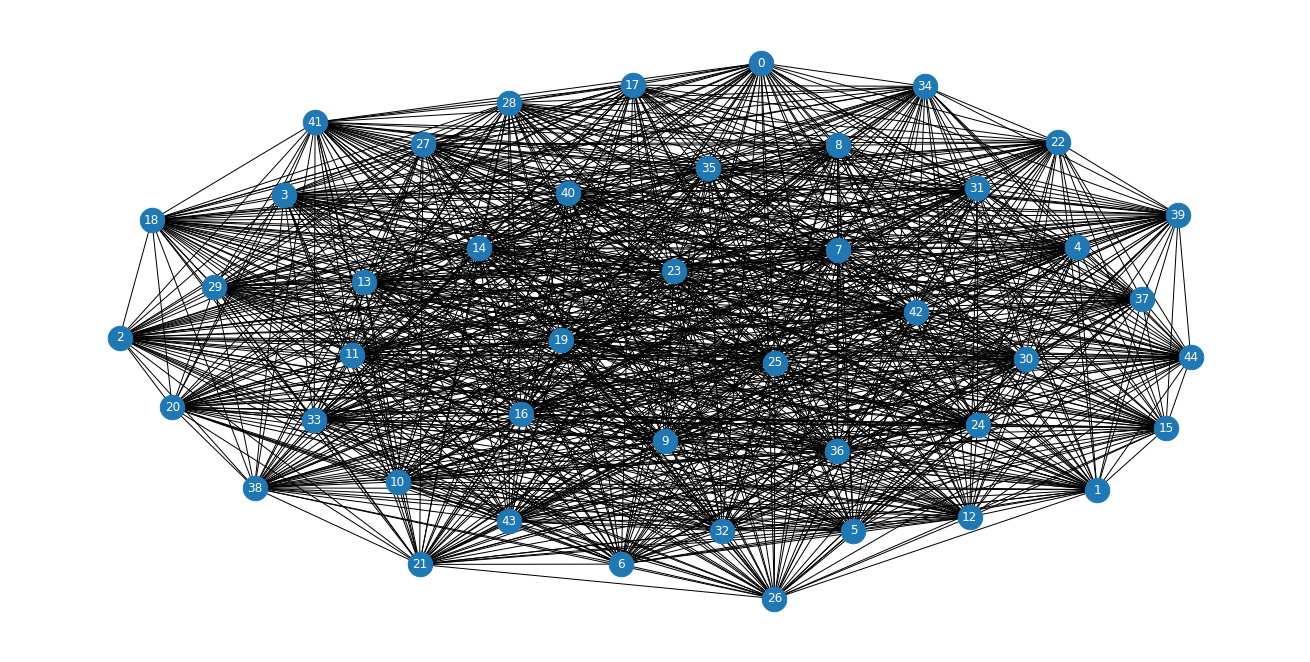

In [ ]:
G_new = nx.Graph()
n = 45
for i in range(n):
  G_new.add_node(i,degreee=n-1)
  for j in range(n):
    if j!=i:
      G_new.add_edge(i,j) 
nx.draw(G_new, node_size=600,font_color='w', with_labels=True)


## Graph traversal

**Traversing a graph** means following the edge structure of a graph (from neighbour to neighbour) to **visit** the nodes of the graph.

Two paradigms:

* **Depth-First Search** (at a node A, visit one unvisited neighbour B of A, then visit one unvisited neighbour C of B or (with lower priority) come back to the neighbours of B).
* **Breadth-First Search** (at a node A, visit one unvisited neighbour B of this node, then visit another unvisited neighbour C of A then come back to the neighbours of neighbours).

In [ ]:
# We set a new atribute called "traversed" to all nodes
nx.set_node_attributes(G, False, "traversed")

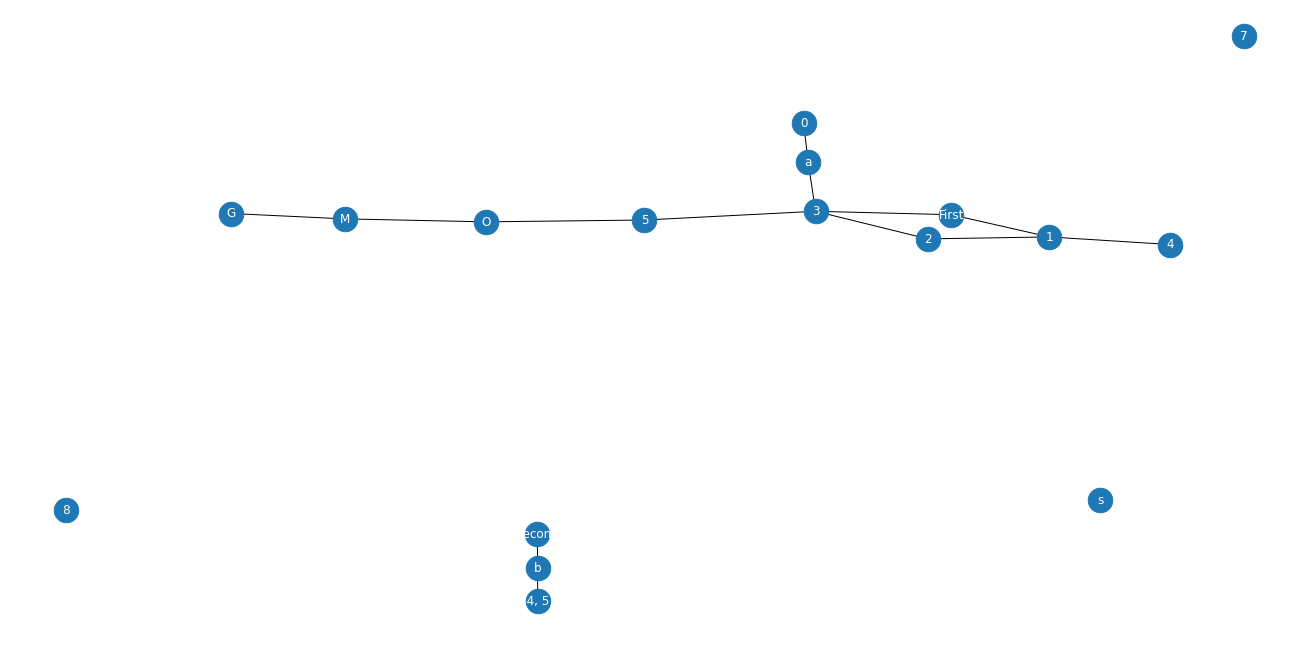

In [ ]:
# Draw it again
nx.draw(G, node_size=600,font_color='w', with_labels=True)

In [ ]:
# Let us check with node 1
G.nodes[1]

{'traversed': False}

In [ ]:
# Let us check with node 1
G.nodes[1]["traversed"]

False

In [ ]:
start_node = 3

# This list will be used as a stack
stack=[]
stack.append(start_node)

# DFS
while len(stack)>0:
    # The last node added is extracted here
    node = stack.pop()
    # If the node has already been traversed, don't do anything
    if not G.nodes[node]["traversed"]:
        print('Traversing node {}'.format(node))
        print(stack)
        # Set the "traversed" attribute to True
        nx.set_node_attributes(G,{node: {"traversed":True}})
        # Cycle over the neighbours
        for neighbour in G.adj[node]:
            if not G.nodes[neighbour]["traversed"]:
                stack.append(neighbour)

Traversing node 3
[]
Traversing node 5
['First', 'a', 2]
Traversing node O
['First', 'a', 2]
Traversing node M
['First', 'a', 2]
Traversing node G
['First', 'a', 2]
Traversing node 2
['First', 'a']
Traversing node 1
['First', 'a']
Traversing node 4
['First', 'a', 'First']
Traversing node First
['First', 'a']
Traversing node a
['First']
Traversing node 0
['First']


In [ ]:
# See the traversed flag at the end
for node in G.nodes:
    print(node,G.nodes[node])

First {'traversed': True}
2 {'traversed': True}
(4, 5) {'traversed': False}
Second {'traversed': False}
3 {'traversed': True}
a {'traversed': True}
b {'traversed': False}
O {'traversed': True}
M {'traversed': True}
G {'traversed': True}
1 {'traversed': True}
0 {'traversed': True}
4 {'traversed': True}
5 {'traversed': True}
s {'attribute': 'My cool attribute', 'traversed': False}
7 {'color': 'red', 'weight': 2.0, 'traversed': False}
8 {'color': 'green', 'weight': 3.0, 'traversed': False}


As you may imagine, traversal algorithms are **already implemented in networkx**.

You can have access:

* to the list of vertices visited by the algorithm,
* to the list of edges visited consecutively.

In [ ]:
# Print the node order/edges order when doing the visit
print(list(nx.dfs_preorder_nodes(G, source=3)))
print(list(nx.edge_dfs(G, source=3)))


[3, 'First', 1, 4, 2, 'a', 0, 5, 'O', 'M', 'G']
[(3, 'First'), ('First', 1), (1, 4), (1, 2), (2, 3), (3, 'a'), ('a', 0), (3, 5), (5, 'O'), ('O', 'M'), ('M', 'G')]


## Removing elements from a graph

You can remove individual nodes, edges or a ist of them (in the same way as we add them).

Now, removing a node implies **removing all its incident edges**.

In [ ]:
# Removal functions
G.remove_node('a')
G.remove_edge('G','M')
G.remove_nodes_from(['M',0])
list(G.nodes)

['First', 2, (4, 5), 'Second', 3, 'b', 'O', 'G', 1, 4, 5, 's', 7, 8]

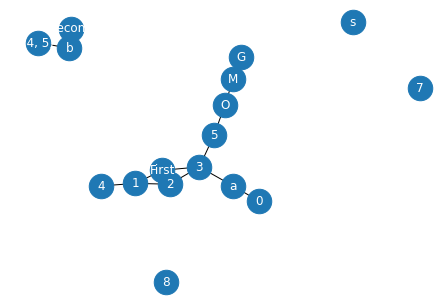

In [ ]:
# Draw the graph
nx.draw(G, node_size=600,font_color='w', with_labels=True)

## Operations on graphs

You have a number of standard operators applying on graphs, or pairs of graphs.

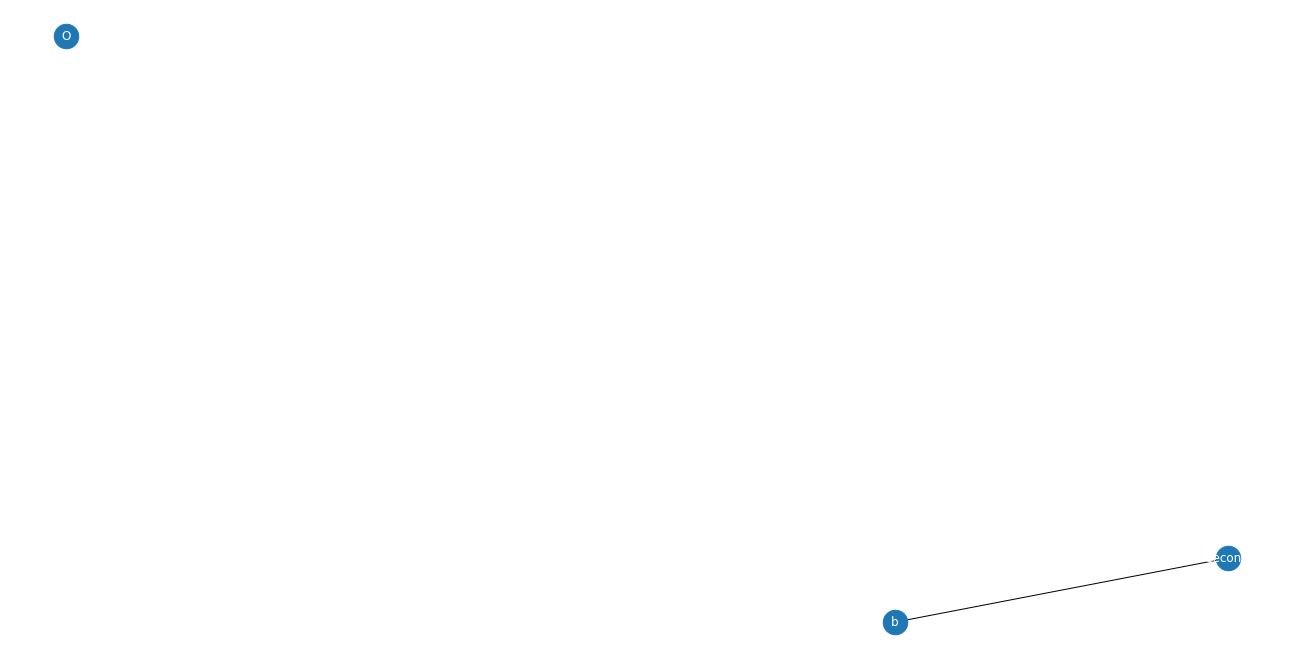

In [ ]:
# Take a subgraph of G
SG = nx.subgraph(G, ['O','Second','b'])
# Draw the graph
nx.draw(SG, node_size=600,font_color='w', with_labels=True)

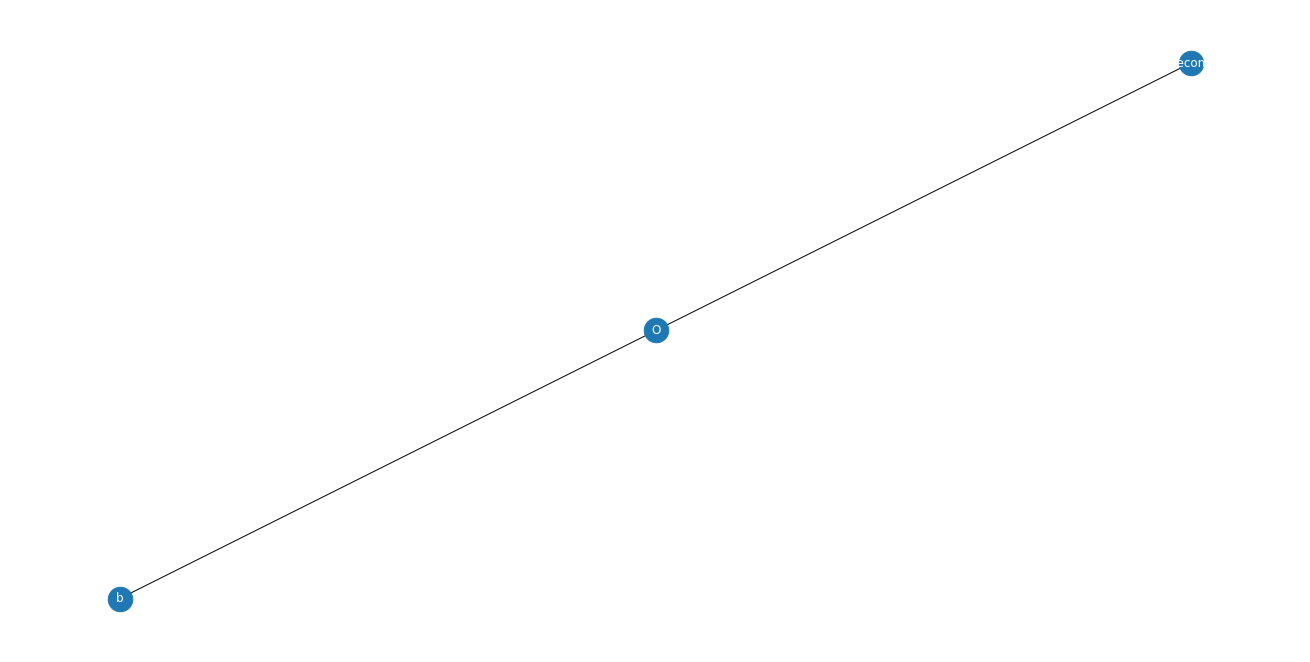

In [ ]:
# Take the complement of a graph
CG = nx.complement(SG)
# Draw the graph
nx.draw(CG, node_size=600,font_color='w', with_labels=True)

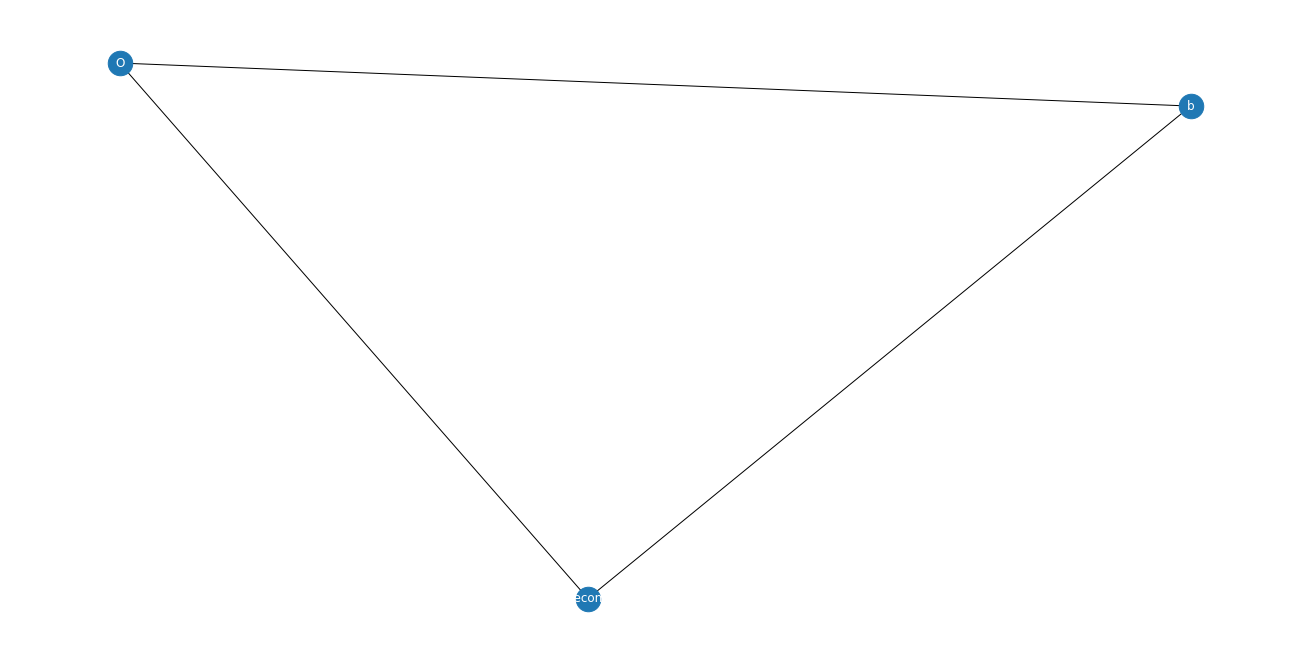

In [ ]:
# Union of two graphs
UG = nx.compose(SG,CG)
# Draw the graph
nx.draw(UG, node_size=600,font_color='w', with_labels=True)


## Weighted graphs

It is super frequent to associate **weights** to edges, to favor some connections over others (e.g. distance between cities along a road network). 

In networkx, those weights are simply **attributes** as the ones we saw before for nodes.

Two ways to add weighted edges:

* *add_weighted_edges_from()*,
* *add_edge()* with a third argument specifying the weight. 

In [ ]:
G = nx.Graph() 
edges = [('A','B', 1.7),('A','C',1.0),('B','D',6.0),('B','E', 3),('C','E', 2)]
# Add weighted edges
G.add_weighted_edges_from(edges)
# Add weighted edges, another way
G.add_edge('F','A',weight=9.3)
# Print adjacency list
print(G.adj)

{'A': {'B': {'weight': 1.7}, 'C': {'weight': 1.0}, 'F': {'weight': 9.3}}, 'B': {'A': {'weight': 1.7}, 'D': {'weight': 6.0}, 'E': {'weight': 3}}, 'C': {'A': {'weight': 1.0}, 'E': {'weight': 2}}, 'D': {'B': {'weight': 6.0}}, 'E': {'B': {'weight': 3}, 'C': {'weight': 2}}, 'F': {'A': {'weight': 9.3}}}


You can edit this attribute afterwards with the dictionary way.

In [ ]:
# Edit the value of a weight
G.edges['A', 'B']['weight'] = 4.2
# Print adjacency list
print(G.adj)

{'A': {'B': {'weight': 4.2}, 'C': {'weight': 1.0}, 'F': {'weight': 9.3}}, 'B': {'A': {'weight': 4.2}, 'D': {'weight': 6.0}, 'E': {'weight': 3}}, 'C': {'A': {'weight': 1.0}, 'E': {'weight': 2}}, 'D': {'B': {'weight': 6.0}}, 'E': {'B': {'weight': 3}, 'C': {'weight': 2}}, 'F': {'A': {'weight': 9.3}}}


{('A', 'B'): Text(0.7499999888241293, 0.433012741974907, '1.7'),
 ('A', 'C'): Text(0.24999998137354879, 0.4330127121725851, '1.0'),
 ('A', 'F'): Text(0.7499999590218074, -0.43301269296576733, '9.3'),
 ('B', 'D'): Text(-0.24999999627470976, 0.4330126982635194, '6.0'),
 ('B', 'E'): Text(4.4703482915409154e-08, 2.4504569873240456e-08, '3'),
 ('C', 'E'): Text(-0.49999996274709757, -5.297752070365647e-09, '2')}

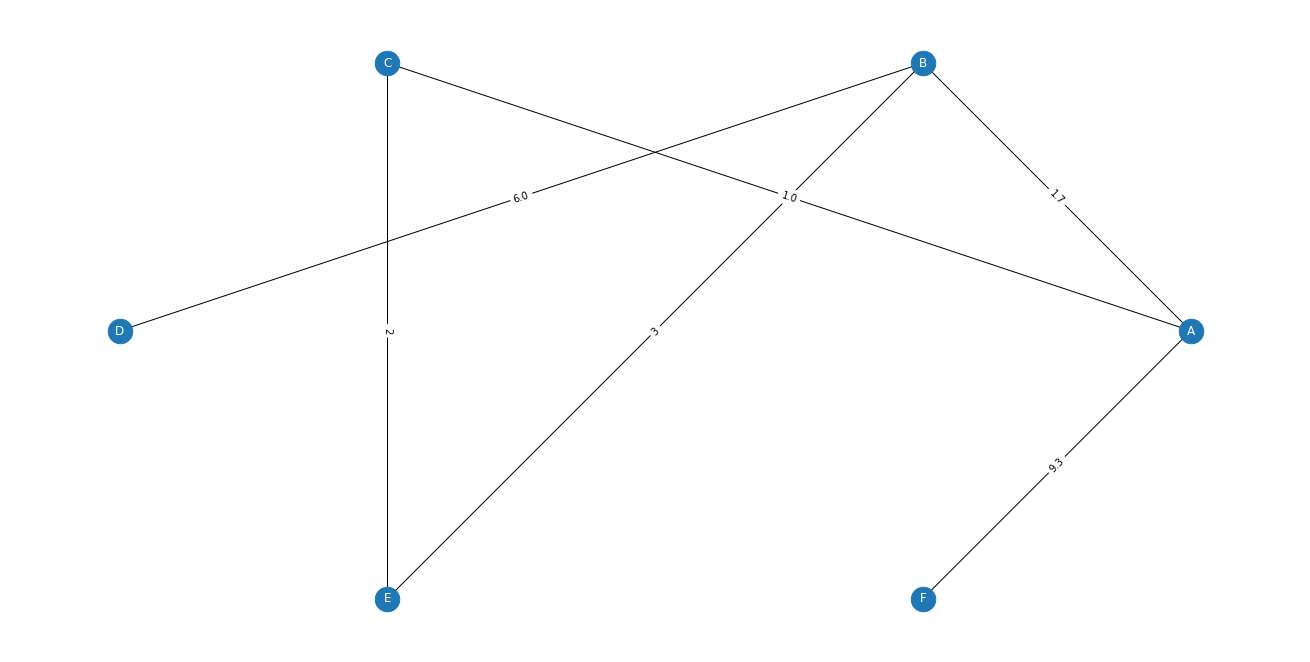

In [ ]:
# Drawing with the weights as labels on edges
edge_weight = nx.get_edge_attributes(G,'weight')
pos         = nx.circular_layout(G)
# This draws the graph 
nx.draw(G, pos=pos, with_labels=True, node_size=600,font_color='w')
# Draws the edges with weights as labels
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels = edge_weight)

## Shortest paths

A very common problems with graphs is the notion of **shortest path**. 

One among (many, many) applications: To find a way to plan a motion for a **robotic system**, which is both **safe** (no collision with **obstacles**) and **short**, we draw random graphs made of random, safe configurations of the robotic system (in maybe high dimension). The edges are those pairs of configurations that can be connected through simple, safe movements. Plannning a motion for a robot consists in **finding a shortest path in this graph** (also called a probabilisti roadmap).

<img src="http://www.osrobotics.org/osr/assets/planning/PRM.png"/>

The **cost associated to a path** is the sum of the weights along this path. A **shortest path** between two nodes is a path whose cost is minimal among the costs of all paths joining these two nodes.  

One of the most popular algorithm is **Dijkstra**, which works under the following assumptions:

* **single source** (you want to determine all the shortest paths from one specific node),
* all weights are **positive**. 

Dijkstra returns a couple with: 

* the list of shortest paths lengths from the selected source to **all the connected graph nodes**.
* the list of shortest paths from the selected source to **all the connected graph nodes**.

In [ ]:
# Dijskstra from A
nx.single_source_dijkstra(G, 'A')

({'A': 0, 'C': 1.0, 'E': 3.0, 'B': 4.2, 'F': 9.3, 'D': 10.2},
 {'A': ['A'],
  'B': ['A', 'B'],
  'C': ['A', 'C'],
  'F': ['A', 'F'],
  'E': ['A', 'C', 'E'],
  'D': ['A', 'B', 'D']})

In [ ]:
# Adding a disconnected node
G.add_node('G')
nx.single_source_dijkstra(G, 'A')

({'A': 0, 'C': 1.0, 'E': 3.0, 'B': 4.2, 'F': 9.3, 'D': 10.2},
 {'A': ['A'],
  'B': ['A', 'B'],
  'C': ['A', 'C'],
  'F': ['A', 'F'],
  'E': ['A', 'C', 'E'],
  'D': ['A', 'B', 'D']})

In [ ]:
# Connecting the new node
G.add_edge('G','B',weight=0.1)
nx.single_source_dijkstra(G, 'A')

({'A': 0, 'C': 1.0, 'E': 3.0, 'B': 4.2, 'G': 4.3, 'F': 9.3, 'D': 10.2},
 {'A': ['A'],
  'B': ['A', 'B'],
  'C': ['A', 'C'],
  'F': ['A', 'F'],
  'E': ['A', 'C', 'E'],
  'D': ['A', 'B', 'D'],
  'G': ['A', 'B', 'G']})

You can also specify that you want only one shortest path.

In [ ]:
# Shortest path between two nodes
path = nx.dijkstra_path(G, 'A', 'D')
print(path)

['A', 'B', 'D']


## Directed/Undirected graphs

The graphs seen up to now are **undirected**: the edges play a symmetrical role.

When we want to specify specific orders in the edges, then we get a **directed graph**.

The **DiGraph class** is used for directed graphs.

In [ ]:
# Create an empty directed graph
DG = nx.DiGraph()

In [ ]:
# Add weighted edges
edges = [('A','B', 1.7),('A','C',1.0),('B','D',-2.0),('B','E', 3),('C','E', 2)]
DG.add_weighted_edges_from(edges)
DG.add_edge('F','A',weight=1.3)
# Print 
print(DG.adj)

{'A': {'B': {'weight': 1.7}, 'C': {'weight': 1.0}}, 'B': {'D': {'weight': -2.0}, 'E': {'weight': 3}}, 'C': {'E': {'weight': 2}}, 'D': {}, 'E': {}, 'F': {'A': {'weight': 1.3}}}


{('A', 'B'): Text(0.0, -0.375, '1.7'),
 ('A', 'C'): Text(-0.625, 0.0, '1.0'),
 ('B', 'D'): Text(0.625, 0.0, '-2.0'),
 ('B', 'E'): Text(0.5, -0.125, '3'),
 ('C', 'E'): Text(-0.125, 0.25, '2'),
 ('F', 'A'): Text(-0.5, -0.25, '1.3')}

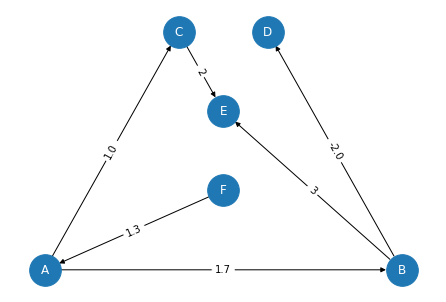

In [ ]:
# Draws a directed, weighted graph
pos         = nx.planar_layout(DG)
edge_weight = nx.get_edge_attributes(DG,'weight')

nx.draw(DG,pos=pos,node_size=1000,font_color='w',with_labels=True)
nx.draw_networkx_edge_labels(DG, pos=pos, edge_labels = edge_weight)

With directed graphs, some of the concepts are adapted to the directionaly, so we have new elements in the DiGraph class:

* *predecessors*, *successors*
* *out_edges*
* *in_degree*, *out_degree*

Note that:

* *neighbors* is equivalent to *successors* 
* *degree* is the sum of *in_degree* and *out_degree even*.

In [ ]:
# Print successors, predecessors, neighbors.
print(list(DG.successors('A')))
print(list(DG.predecessors('A')))
print(list(DG.neighbors('A')))


['B', 'C']
['F']
['B', 'C']


In [ ]:
# Print degrees
print(DG.out_degree('A'),DG.in_degree('A'),DG.degree('A'))

2 1 3


In [ ]:
# Print in/out edges
print(DG.out_edges('A'))
print(DG.in_edges('A'))

[('A', 'B'), ('A', 'C')]
[('F', 'A')]


**Exercise**: determine the shortest (directed!) path from F to E.

You can transform an **undirected graph** to a **directed graph** (and vice versa).

{('A', 'B'): Text(0.07894736842105265, -0.34210526315789475, '4.2'),
 ('A', 'C'): Text(-0.5657894736842105, -0.06578947368421054, '1.0'),
 ('A', 'F'): Text(-0.47368421052631576, -0.25, '9.3'),
 ('B', 'A'): Text(0.07894736842105265, -0.34210526315789475, '4.2'),
 ('B', 'D'): Text(0.5394736842105263, -0.06578947368421054, '6.0'),
 ('B', 'E'): Text(0.4473684210526316, -0.15789473684210528, '3'),
 ('B', 'G'): Text(0.631578947368421, 0.02631578947368418, '0.1'),
 ('C', 'A'): Text(-0.5657894736842105, -0.06578947368421054, '1.0'),
 ('C', 'E'): Text(-0.19736842105263153, 0.11842105263157894, '2'),
 ('D', 'B'): Text(0.5394736842105263, -0.06578947368421054, '6.0'),
 ('E', 'B'): Text(0.4473684210526316, -0.15789473684210528, '3'),
 ('E', 'C'): Text(-0.19736842105263153, 0.11842105263157894, '2'),
 ('F', 'A'): Text(-0.47368421052631576, -0.25, '9.3'),
 ('G', 'B'): Text(0.631578947368421, 0.02631578947368418, '0.1')}

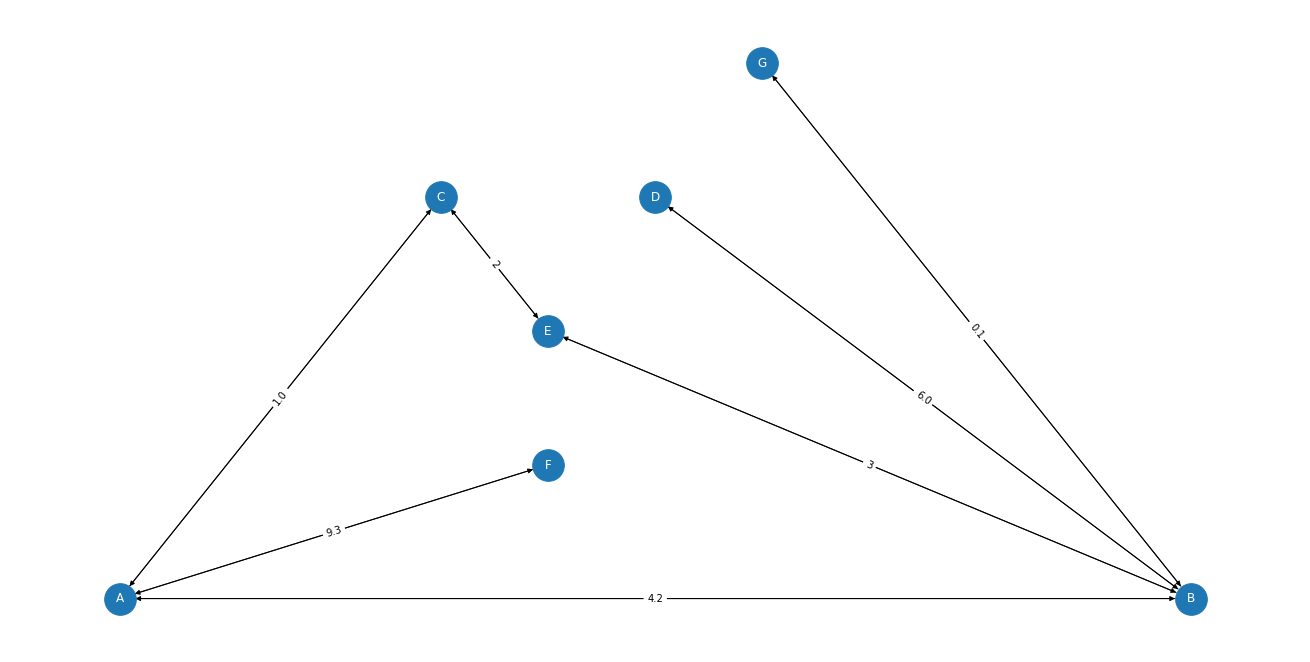

In [ ]:
# Transforms G into directed graph
Gd = G.to_directed()

# Draws the graph
pos         = nx.planar_layout(G)
edge_weight = nx.get_edge_attributes(Gd,'weight')
nx.draw(Gd,pos=pos,node_size=1000,font_color='w',with_labels=True)
nx.draw_networkx_edge_labels(Gd, pos=pos, edge_labels = edge_weight)

## Using graph templates

There are a number of **pre-defined graphs** that you can use

* *petersen_graph()*
* *tutte_graph()*
* *sedgewick_maze_graph()*
* *tetrahedral_graph()*
* *complete_graph(n)*
* *complete_bipartite_graph(n1,n2)*
* *barbell_graph(m1, m2)*
* ....


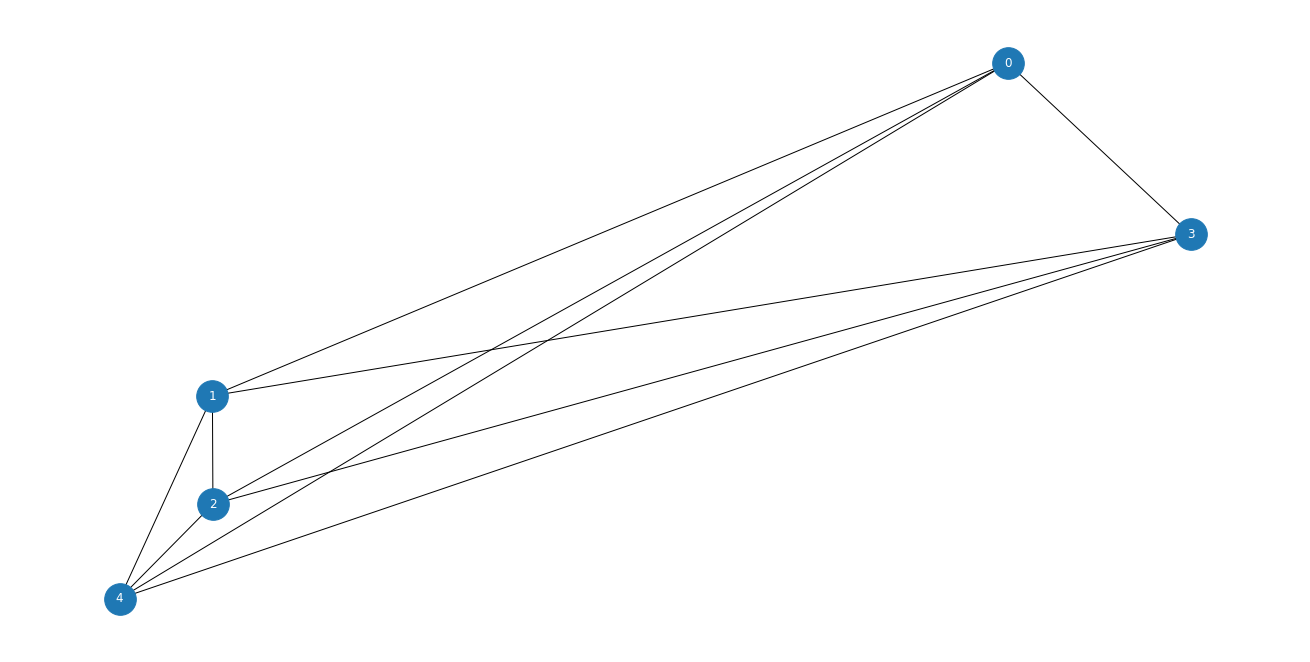

In [ ]:
# Complete graph with 5 nodes
G = nx.complete_graph(5)
nx.draw(G,pos=nx.random_layout(G),node_size=1000,font_color='w',with_labels=True)

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


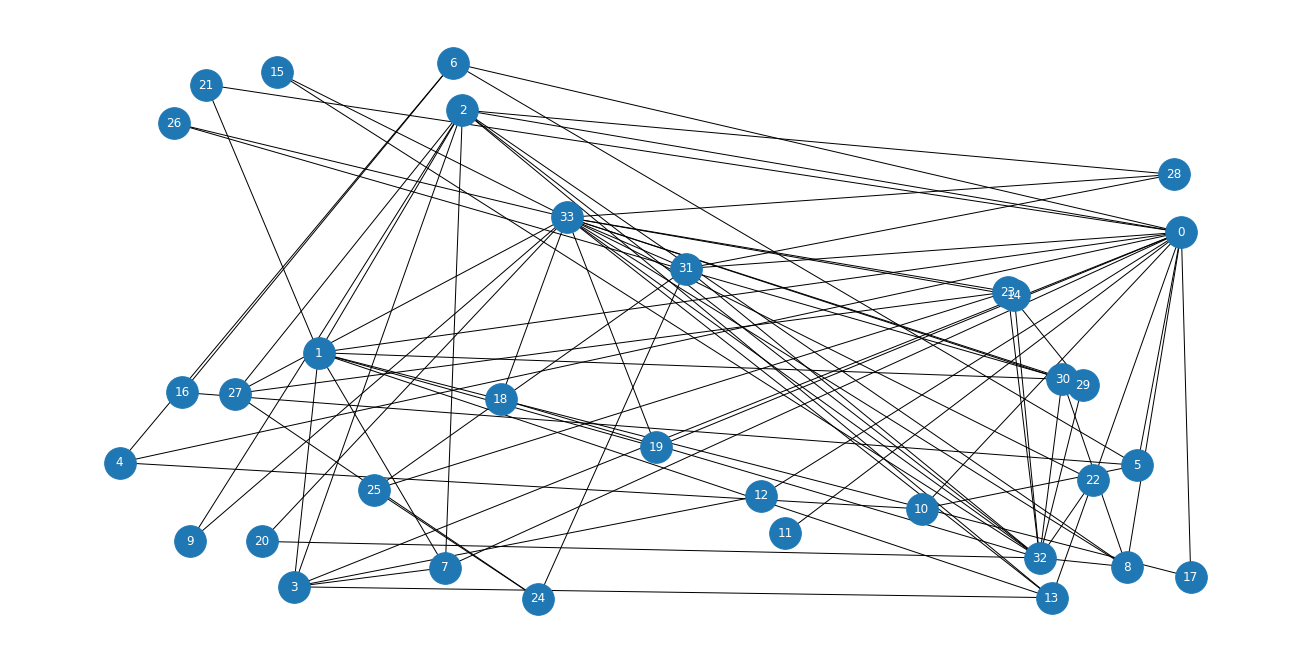

In [ ]:
# The karate club graph
G = nx.karate_club_graph()
nx.draw(G,pos=nx.random_layout(G),node_size=1000,font_color='w',with_labels=True)
print(G)


## Visualization: algorithmx

In [ ]:
!pip install algorithmx
from algorithmx import jupyter_canvas
from google.colab import output
output.enable_custom_widget_manager()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.0 MB/s eta 0:00:00


In [ ]:
# This is how you use algorithmx
canvas = jupyter_canvas()
canvas.nodes(G.nodes).add()
canvas.edges(G.edges).add()
canvas

JupyterWidget(events=['{"attrs": {"nodes": {"First": {}, "2": {}, "(4, 5)": {}, "Second": {}, "3": {}, "a": {}…

In [ ]:
canvas = jupyter_canvas(buttons=True)
canvas.size((500, 400))

# Generate a 'caveman' graph with 3 cliques of size 4
G = nx.connected_caveman_graph(3, 4)

# Add nodes and edges
canvas.nodes(G.nodes).add()
canvas.edges(G.edges).add()
canvas.pause(1)

# Traverse the graph using depth-first search
dfs = nx.edge_dfs(G, 0)

# Animate the traversal
source = None
for e in dfs:
    if e[0] != source:
        # Resize the source
        canvas.node(e[0]).size('1.25x').color('purple')
        if source is not None:
            canvas.node(source).size('0.8x')

        # Update the source
        source = e[0]
        canvas.pause(0.5)

    # Traverse the edge
    canvas.edge(e).traverse('pink')
    canvas.pause(0.5)

canvas.node(source).size('0.8x')

canvas



JupyterWidget(events=['{"attrs": {"size": [500, 400]}}', '{"attrs": {"nodes": {"0": {}, "1": {}, "2": {}, "3":…

In [ ]:
import random
random.seed(436)

canvas = jupyter_canvas(buttons=True)
canvas.size((500, 400))

# Generate a random graph with random edge weights
G = nx.newman_watts_strogatz_graph(16, 2, 0.4, seed=537)
nx.set_edge_attributes(G, {e: random.randint(1, 20) for e in G.edges}, 'weight')

# Add nodes and edges with weight labels
canvas.nodes(G.nodes).add()
canvas.edges(G.edges).add(
    labels=lambda e: {0: {'text': G.edges[e]['weight']}}
)
canvas.pause(1)

# Select the source and target
source = 0
target = 8
canvas.node(source).color('green').highlight().size('1.25x')
canvas.node(target).color('red').highlight().size('1.25x')
canvas.pause(1.5)

# Run Dijkstra's shortest path algorithm
path = nx.dijkstra_path(G, source, target)

# Animate the algorithm
path_length = 0
for i in range(len(path) - 1):
    u, v = path[i], path[i + 1]

    # Update the path length
    path_length += G[u][v]['weight']

    # Traverse the edge
    canvas.edge((u, v)).traverse('blue')
    canvas.pause(0.4)

    # Make the next node blue
    if v != target:
        canvas.node(v).color('blue')

    # Add a label to indicate current path length
    canvas.node(v).label('path').add(
        color='blue',
        text=path_length
    )
    canvas.pause(0.4)

canvas


JupyterWidget(events=['{"attrs": {"size": [500, 400]}}', '{"attrs": {"nodes": {"0": {}, "1": {}, "2": {}, "3":…

## Centrality algorithms

**Closeness centrality** is evaluated as the **inverse of the sum of the shortest paths lengths** between a given node and all other nodes. Works for undirected/directed nodes.


In [ ]:
# Karate club graph
G          = nx.karate_club_graph()

# Closeness centrality
centrality = nx.closeness_centrality(G)

# Map node -> scaled centrality for node size
formatted_centrality = {k: int(40*v) for k, v in centrality.items()}

# Drawing
canvas = jupyter_canvas()
canvas.nodes(G.nodes).add(
  size= lambda n: formatted_centrality[n]
)
canvas.edges(G.edges).add()
canvas


JupyterWidget(events=['{"attrs": {"nodes": {"0": {"size": 22}, "1": {"size": 19}, "2": {"size": 22}, "3": {"si…

Betweenness centrality **measures the extent to which a node lies on paths between other nodes in the graph**.



In [ ]:
# Karate club graph
G          = nx.karate_club_graph()

# Betweeness centrality
centrality = nx.betweenness_centrality(G)

# Map node -> scaled centrality for node size
formatted_centrality = {k: int(40*v) for k, v in centrality.items()}

# Drawing
canvas = jupyter_canvas()
canvas.nodes(G.nodes).add(
  size= lambda n: formatted_centrality[n]
)
canvas.edges(G.edges).add()
canvas


{0: 17, 1: 2, 2: 5, 3: 0, 4: 0, 5: 1, 6: 1, 7: 0, 8: 2, 9: 0, 10: 0, 11: 0, 12: 0, 13: 1, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 1, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 5, 32: 5, 33: 12}


JupyterWidget(events=['{"attrs": {"nodes": {"0": {"size": 17}, "1": {"size": 2}, "2": {"size": 5}, "3": {"size…

## Minimum spanning trees

A **spanning tree** is a tree (i.e. a connected graph with no cycle) that connects all the nodes of a graph.

To a tree you can associate a cost, which is the sum of the weights along each edge of the tree. A minimum spanning tree is such that this cost is minimal among the spanning trees.

In [ ]:
import random
random.seed(436)

canvas = jupyter_canvas(buttons=True)
canvas.size((500, 400))

# Generate a random graph with random edge weights
G = nx.newman_watts_strogatz_graph(16, 2, 0.4, seed=537)
nx.set_edge_attributes(G, {e: random.randint(1, 20) for e in G.edges}, 'weight')

# Add nodes and edges with weight labels
canvas.nodes(G.nodes).add()
canvas.edges(G.edges).add(
    labels=lambda e: {0: {'text': G.edges[e]['weight']}}
)
canvas

JupyterWidget(events=['{"attrs": {"size": [500, 400]}}', '{"attrs": {"nodes": {"0": {}, "1": {}, "2": {}, "3":…

In [ ]:
T = nx.minimum_spanning_tree(G)
print(T.edges())


[(0, 1), (0, 15), (1, 5), (1, 14), (1, 2), (2, 3), (3, 4), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (13, 14)]


In [ ]:
node_pos   =nx.get_node_attributes(G,'pos')
edge_weight=nx.get_edge_attributes(G,'weight')
mst_edges  = T.edges()
node_col   = ['white']

canvas = jupyter_canvas(buttons=True)
canvas.size((500, 400))
# Add nodes and edges with weight labels
canvas.nodes(G.nodes).add()
canvas.edges(G.edges).add(
    color=lambda e: 'red' if e in mst_edges else 'white'
)
canvas


JupyterWidget(events=['{"attrs": {"size": [500, 400]}}', '{"attrs": {"nodes": {"0": {}, "1": {}, "2": {}, "3":…

## Flow networks

This is a very common modelling tool for **logistics**. Imagine you have a producing center (a factory) connected to a distribution center through a set of local transports, each with a given **capacity** i.e. a limit on how much they can accept to transport. Then the question is how muh you could safely produce and send to your distribution center.

Surprisingly, it has applications much farther than in logistics: Some optimization with regularization problems can be cast as flow networks.  

In [ ]:
DG=nx.DiGraph()

# Nodes
DG.add_nodes_from(["Source","1","2","3","4","5","Sink"])

# Edges witgh capacities
DG.add_weighted_edges_from([("Source","1",10.0),("Source","2",3.0),("Source","3",7.0),("1","2",5.0),("1","4",3.0),("2","4",4.0),("2","3",7.0),("2","5",4.0),("3","5",3.0),("4","Sink",9.0),("5","Sink",2.0)],weight='capacity')  

# 
node_colors = {"Source": 'red', "1": 'gray', "2": 'gray', "3": 'gray', "4": 'gray', "5": 'gray', "Sink": 'blue'}


# Positions
node_pos = {"Source": (0,200), "1": (100,50), "2": (100,200), "3": (100,350), "4": (300,50), "5": (300,350), "Sink": (400,200)}

# Specify the capacity values for the edges
edge_capacity=nx.get_edge_attributes(DG,'capacity')

canvas = jupyter_canvas(buttons=True)
canvas.size((500, 500))
# Add nodes and edges with weight labels
canvas.nodes(DG.nodes).add(size=25,color=lambda n: node_colors[n],pos =lambda n: node_pos[n],fixed=True)
canvas.edges(DG.edges).add(
    labels=lambda e: {0: {'text': DG.edges[e]['capacity']}},directed=True
)
canvas

JupyterWidget(events=['{"attrs": {"size": [500, 500]}}', '{"attrs": {"nodes": {"Source": {"size": 25, "color":…

In [ ]:
nx.maximum_flow_value(DG, _s="Source", _t="Sink")


9.0

In [ ]:
value,flow = nx.maximum_flow(DG, _s="Source", _t="Sink")
print(flow)

{'Source': {'1': 7.0, '2': 0, '3': 2.0}, '1': {'2': 4.0, '4': 3.0}, '2': {'4': 4.0, '3': 0, '5': 0}, '3': {'5': 2.0}, '4': {'Sink': 7.0}, '5': {'Sink': 2.0}, 'Sink': {}}


In [ ]:
canvas = jupyter_canvas(buttons=True)
canvas.size((500, 500))
# Add nodes and edges with weight labels
canvas.nodes(DG.nodes).add(size=25,color=lambda n: node_colors[n],pos =lambda n: node_pos[n],fixed=True)
init_edges = canvas.edges(DG.edges).add(directed=True)
init_edges.label().add(
     text=lambda e: DG.edges[e]['capacity']
)
init_edges.label('flow').add(
     color='blue',
     text=lambda e: flow[e[0]][e[1]]
)
canvas

JupyterWidget(events=['{"attrs": {"size": [500, 500]}}', '{"attrs": {"nodes": {"Source": {"size": 25, "color":…